## 问题描述

为了研究人体的心肺功能，对31个成年男子测量了肺活量(OXY)，并且记录了他们的年龄(age)、体重(weight)，以及简单训练后的测试数据：跑1.5英里的时间(time)、休息时的脉搏(spulse)、跑步时的脉搏(rpulse)和跑步时记录的最大脉搏(mpulse)，共7项指标。

1. 分别绘制OXY与time和age的散布图，从图中可得出什么结论？
2. 绘制7项指标的散布图简陋，从这里能不能直接看出一些结论；
3. 绘制序号为1, 2, 21, 22的4个人的轮廓图和雷达图；
4. 绘制序号为1, 2, 21, 22的4个人的调和曲线图（放在同一张图上）。


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 支持中文字体
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

# 读取文件
file_path = 'Data/OXY.csv'
data = pd.read_csv(file_path)
data.head()

,序号,age,weight,time,spulse,rpulse,mpulse,OXY
0,1,57,73.37,12.63,58,174,176,39.407
1,2,54,79.38,11.17,62,156,165,46.080
2,3,52,76.32,9.63,48,164,166,45.441
3,4,50,70.87,8.92,48,146,155,54.625
4,5,51,67.25,11.08,48,172,172,45.118


#### 1.分别绘制OXY与time和age的散布图，从图中可得出什么结论？

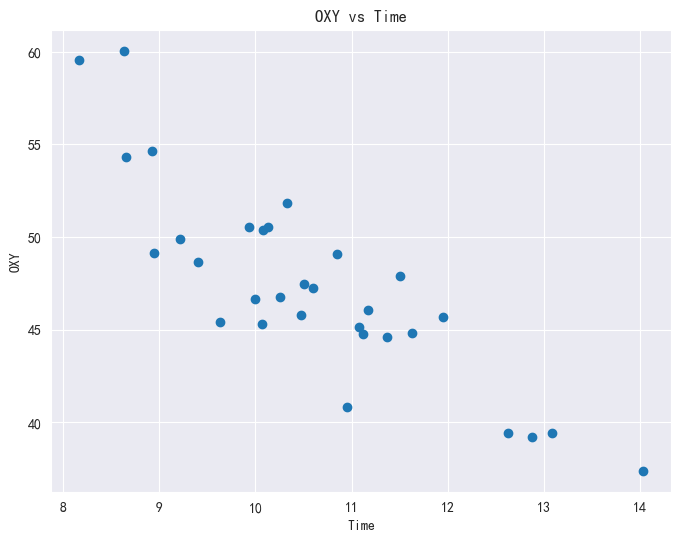

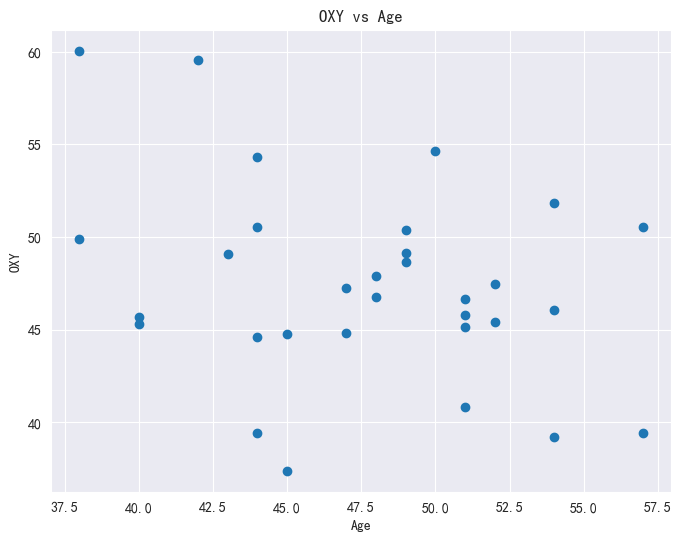

In [5]:
# OXY vs time
plt.figure(figsize=(8, 6))
plt.scatter(data['time'], data['OXY'])
plt.title('OXY vs Time')
plt.xlabel('Time')
plt.ylabel('OXY')
plt.grid(True)
plt.savefig('figure/OXY_vs_Time.png')
plt.show()

# OXY vs age
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['OXY'])
plt.title('OXY vs Age')
plt.xlabel('Age')
plt.ylabel('OXY')
plt.grid(True)
plt.savefig('figure/OXY_vs_Age.png')
plt.show()

#### 从图中观察到，肺活量（OXY）与跑$1.5$英里的时间（time）之间存在负相关关系。即，用时越长的人肺活量往往越低。而肺活量（OXY）与年龄(age)之间没有明显的相关关系。

#### 2.绘制7项指标的散布图简陋，从这里能不能直接看出一些结论

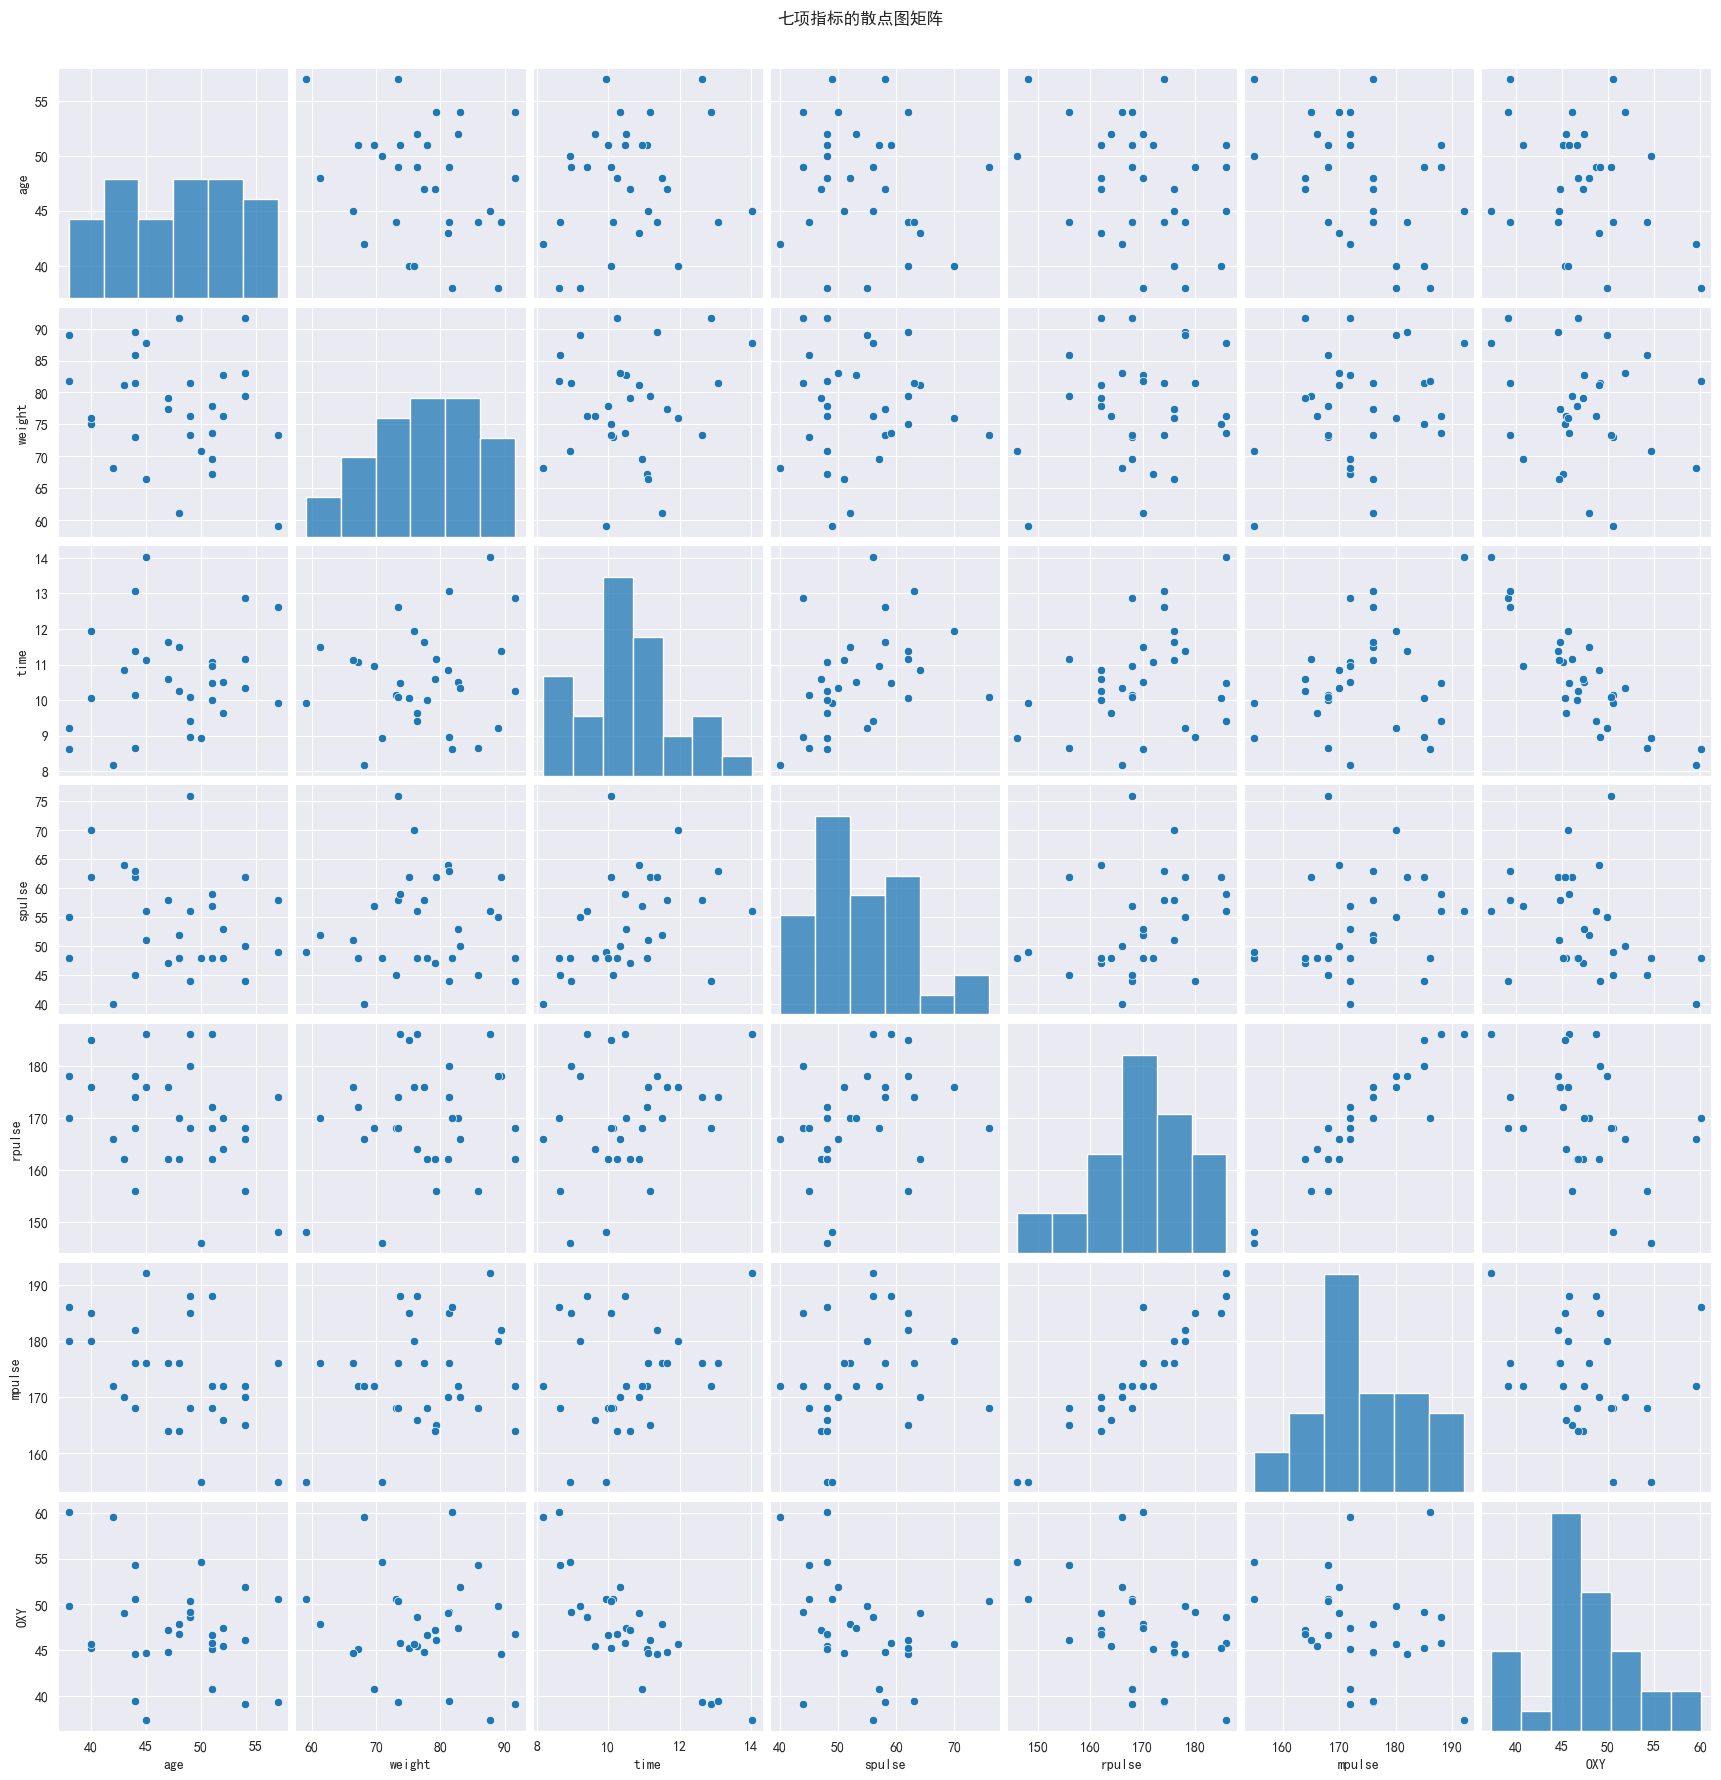

In [6]:
# 选择指标
data_selected = data[['age', 'weight', 'time', 'spulse', 'rpulse', 'mpulse', 'OXY']]

# 绘制散点图矩阵
sns.pairplot(data_selected)
plt.suptitle("七项指标的散点图矩阵", y=1.02)
plt.savefig('figure/Scatter_Plot_Matrix.png')
plt.show()

#### 从图中观察到 除了 OXY 与 time之间存在负相关关系， 跑步时的脉搏（rpulse）和跑步时记录的最大脉搏（mpulse）之间还存在正相关关系。

#### 3.绘制序号为1, 2, 21, 22的4个人的轮廓图和雷达图；

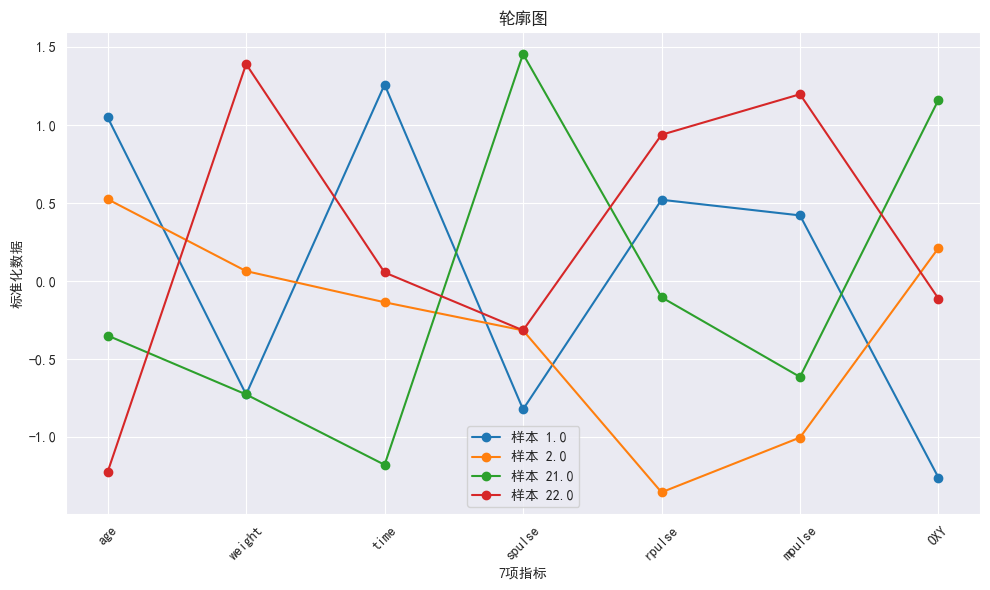

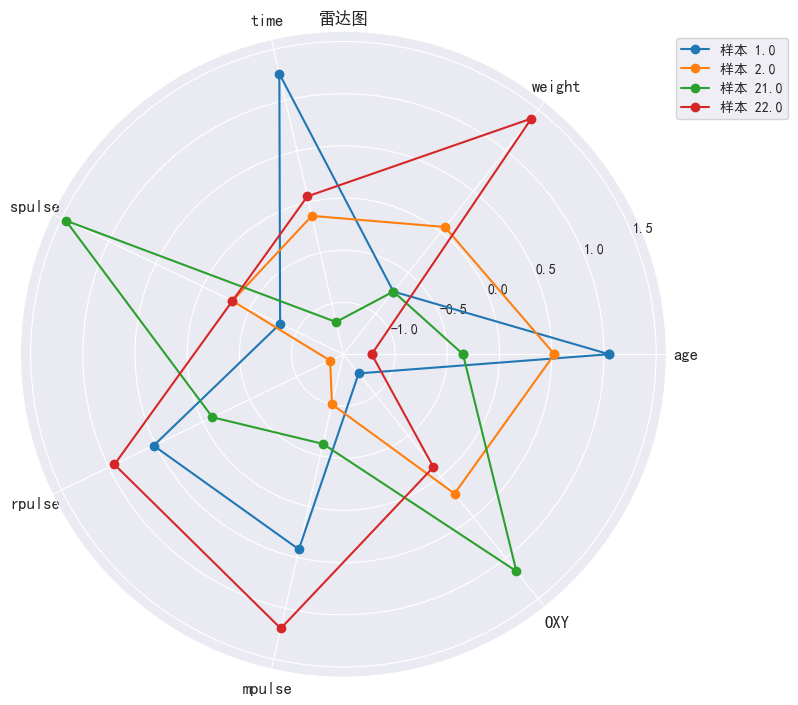

In [7]:
# 获取序号为 1, 2, 21, 22 的数据
selected_samples = data.loc[data['序号'].isin([1, 2, 21, 22])]

# 获取相关特征
features = ['age', 'weight', 'time', 'spulse', 'rpulse', 'mpulse', 'OXY']
selected_data = selected_samples[features]

# 标准化
standardized_data = (selected_data - selected_data.mean()) / selected_data.std()

# 绘制轮廓图
plt.figure(figsize=(10, 6))
for i, sample in enumerate(standardized_data.values):
    plt.plot(features, sample, marker='o', label=f'样本 {selected_samples.iloc[i]["序号"]}')

plt.title('轮廓图')
plt.xlabel('7项指标')
plt.ylabel('标准化数据')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figure/Contour_Plot.png')
plt.show()

# 雷达图绘制
labels = features
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 8))

for i, sample in enumerate(standardized_data.values):
    values = sample.tolist()
    values += values[:1]

    plt.polar(angles, values, marker='o', label=f'样本 {selected_samples.iloc[i]["序号"]}')

# 绘制雷达图
plt.title('雷达图')
plt.xticks(angles[:-1], labels, fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig('figure/Radar_Chart.png')
plt.show()

#### 4.绘制序号为1, 2, 21, 22的4个人的调和曲线图（放在同一张图上）。

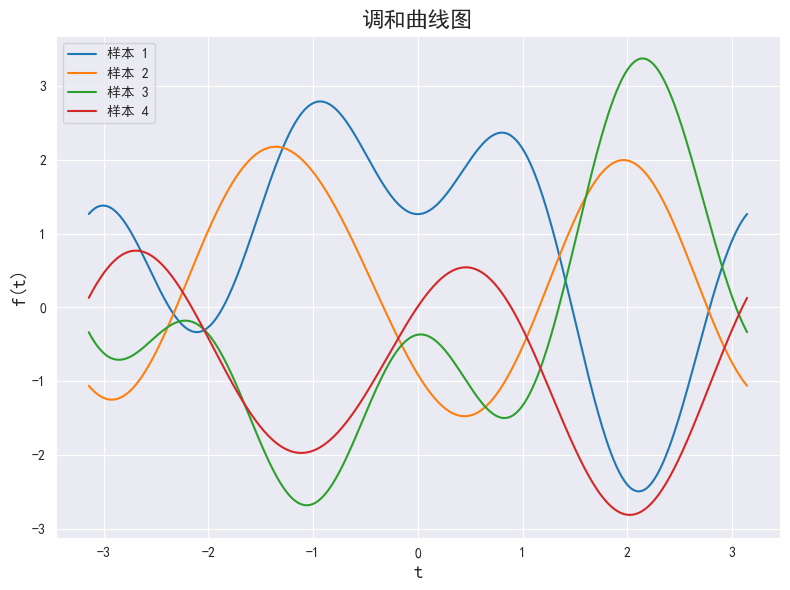

In [8]:
# 调和曲线图函数
def Andrews(x):
    if isinstance(x, pd.DataFrame):
        x = x.values

    # 设置调和曲线自变量
    t = np.linspace(-np.pi, np.pi, 500)

    # 获得数据维度
    m, n = x.shape

    # 储存数据
    f = np.zeros((m, len(t)))

    # 代入调和曲线表达式
    for i in range(m):
        f[i, :] = x[i, 0] / np.sqrt(2)
        for j in range(1, n):
            if j % 2 == 0:
                f[i, :] += x[i, j] * np.cos(j // 2 * t)
            else:
                f[i, :] += x[i, j] * np.sin(j // 2 * t)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot([np.min(t), np.max(t)], [np.min(f), np.max(f)], 'k-', alpha=0)  # To set the plot limits
    plt.title('调和曲线图', fontsize=16)
    plt.xlabel('t', fontsize=14)
    plt.ylabel('f(t)', fontsize=14)

    # Plot each row in f as a separate line
    for i in range(m):
        plt.plot(t, f[i, :], label=f'样本 {i + 1}')

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('figure/Harmonic_Curve.png')
    plt.show()


Andrews(standardized_data)